#Partie 1: Données crédits bancaires

##Libraries

In [ ]:
import requests
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot


from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
from sklearn.metrics import f1_score as f1
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


from imblearn import under_sampling
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

## Importation des données

In [ ]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/german.csv'
response = requests.get(url)

with open('filename.csv', 'wb') as file:
    file.write(response.content)

column_names = ["Status of existing checking account",
                "Duration in month",
                "Credit history",
                "Purpose",
                "Credit amount",
                "Savings account/bonds",
                "Present employment since",
                "Installment rate in percentage of disposable income",
                "Personal status and sex",
                "Other debtors / guarantors",
                "Present residence since",
                "Property",
                "Age in years",
                "Other installment plans",
                "Housing",
                "Number of existing credits at this bank",
                "Job",
                "Number of people being liable to provide maintenance for",
                "Telephone",
                "foreign worker",
                "target"]

# Charger le fichier CSV dans un DataFrame pandas
data = pd.read_csv('filename.csv', sep=',', header=None)
data.columns=column_names


# Analyse exploratoire

In [ ]:
# Afficher les premières lignes du fichier
data.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
# Afficher la taille du fichier CSV
print("La taille du dataset égale à", len(data))

La taille du dataset égale à 1000


In [ ]:
# summarize the shape of the dataset
print(data.shape)

(1000, 21)


In [ ]:
#Statistiques descriptives pour les variables numériques
data.describe()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [ ]:
#Informations sur les types de données et les valeurs manquantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

### Summarize the class distribution

In [ ]:
target = data.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
 per = v / len(target) * 100
 print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=700, Percentage=70.000%
Class=2, Count=300, Percentage=30.000%


###Plot the distribution of the class

In [ ]:
data['target'] = data['target'].astype(str)
fig = px.histogram(data, x='target', color='target')
fig.update_layout(
    title={
          'text':"target",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
        height=400,  # Set the height of the plot
    width=400,    # Set the width of the plot

)
fig.show()

Target (Possibilité de remboursement):


*   1: Oui
*   2: Non


La répartition des classes est résumée par ce grpahique d'histogramme, confirmant le nombre de bons et de mauvais clients et le pourcentage de cas dans la classe minoritaire et majoritaire. Cette répartition montre que les classes ne sont pas équilibrées.

### Summarize the distributions of variables

In [ ]:
for column in data.columns:
    print(data[column].value_counts())
    print('========================================================')
    print('\n')

A14    394
A11    274
A12    269
A13     63
Name: Status of existing checking account, dtype: int64


24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: Duration in month, dtype: int64


A32    530
A34    293
A33     88
A31     49
A30     40
Name: Credit history, dtype: int64


A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
Name: Purpose, dtype: int64


1478    3
1262    3
1258    3
1275    3
1393    3
       ..
1459    1
882     1
3758    1
1136    1
4576    1
Name: Credit amount, Length: 921, dtype: int64


A61    603
A65    183
A62    103
A63     63
A64     48
Name: Savings account/bonds, dtype: int64


A73    339
A75    253
A74   

### Plot histograms for the distributions of the variables

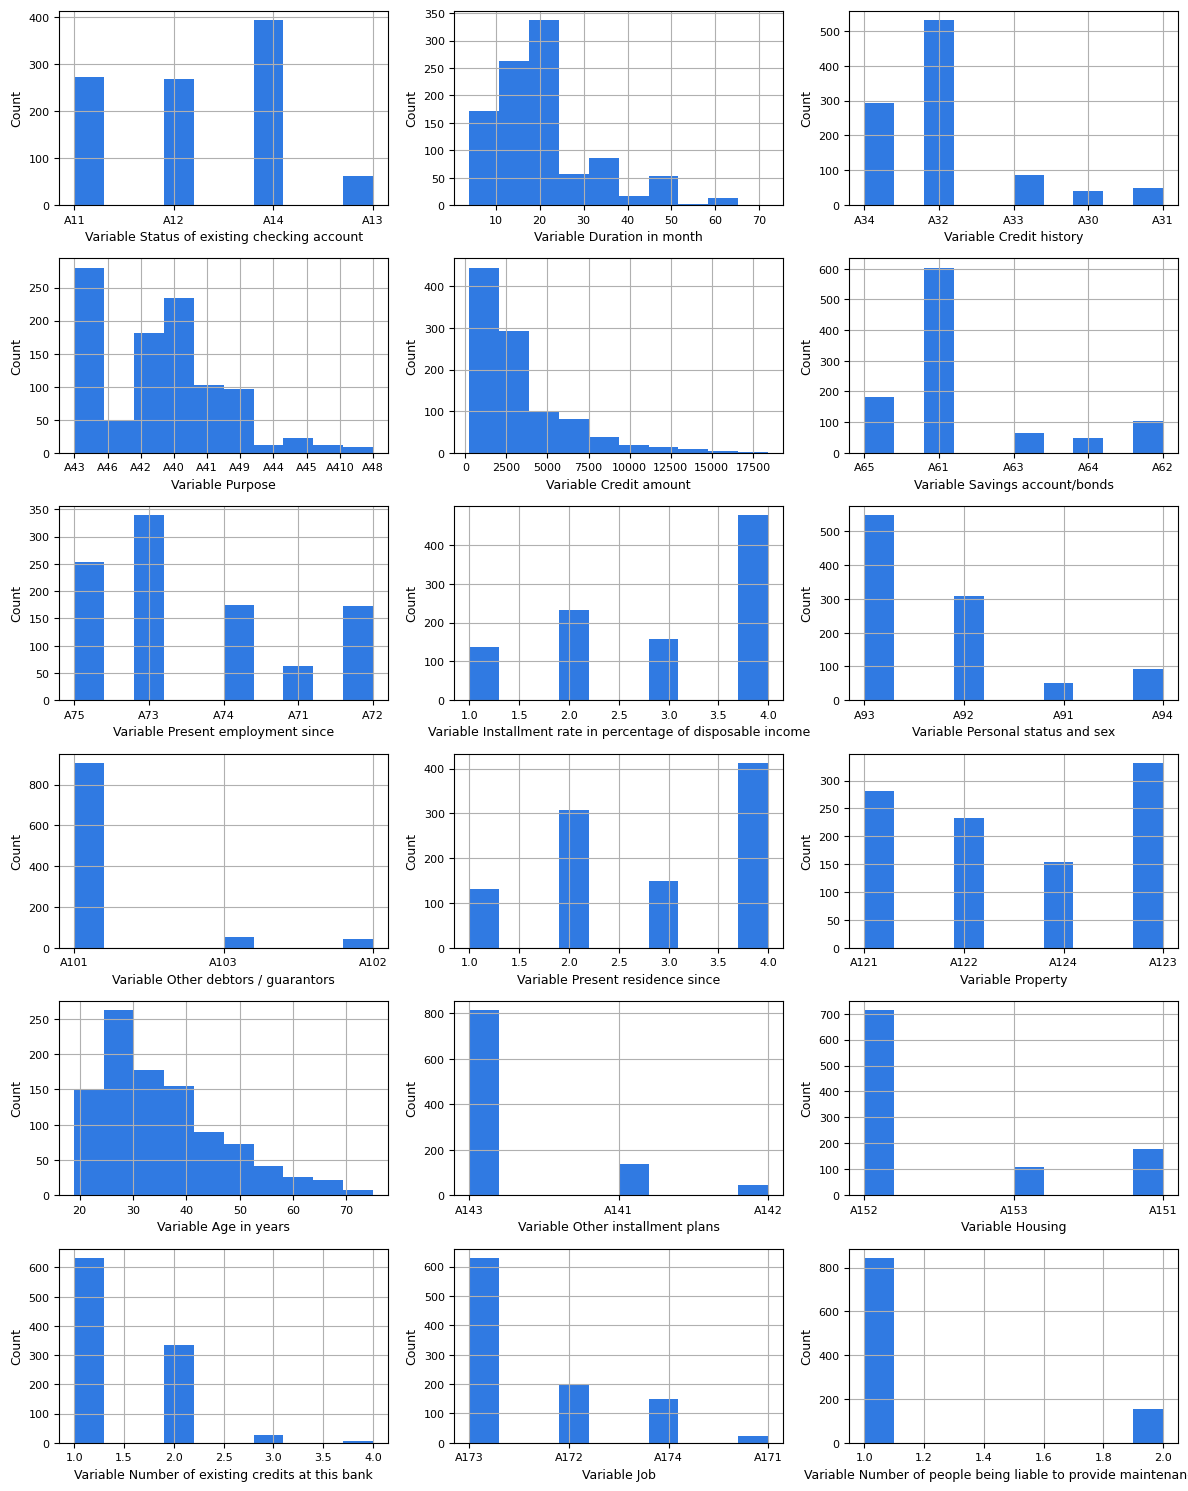

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 15))  # Creating a 5x4 grid of subplots


# Assuming you have a list of column names excluding the target column
columns_to_plot = [col for col in data.columns if col != 'target_column']  # Replace 'target_column' with your actual target column name



for i, ax in enumerate(axes.flatten()):
    if i < 20:
        ax.hist(data[columns_to_plot[i]], color='#307AE2')  # Plotting histogram for data[i]
        #ax.set_title('Variable {}'.format(columns_to_plot[i]), fontsize=9)  # Set title for each subplot
        ax.set_xlabel('Variable {}'.format(columns_to_plot[i]), fontsize=9)  # Label for x-axis
        ax.set_ylabel('Count', fontsize=9)  # Label for y-axis
        ax.grid(True)  # Show grid
        ax.tick_params(axis='x', labelsize=8)  # Set x-axis tick label font size to 8
        ax.tick_params(axis='y', labelsize=8)  # Set y-axis tick label font size to 8

# Adjust layout to prevent overlap of titles
plt.tight_layout()
plt.show()  # Display the grid of histograms

D'après cette représentation graphique pour les variables de notre dataset, nous pouvons voir de nombreuses distributions différentes, certaines avec des distributions de type gaussienne (variables age in years, variable duration in month et la variable purpose), d'autres avec des distributions apparemment exponentielles (variable Credit amount) ou discrètes (variable Job, housing, etc.).

In [ ]:
# Pivot the data to have separate columns for each target
pivot_data = data.groupby(['Personal status and sex', 'target']).size().unstack(fill_value=0).reset_index()

# Create a grouped bar chart using Plotly Express with the pivoted data
fig = px.bar(pivot_data, x='Personal status and sex', y=data['target'],
             labels={'Personal status and sex': 'Personal status and sex'},
             title='Count Plot by Personal status and sex',
             barmode='group')
fig.update_layout(
    xaxis_title='Personal status and sex',
    yaxis_title='Count',
    width=700, height=500)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1266: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1266: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Personal status and sex categories:
*   A91 : male   : divorced/separated
*   A92 : female : divorced/separated/married
*   A93 : male   : single
*	  A94 : male   : married/widowed
*	  A95 : female : single


D'après cet histogramme, nous observons que la catégorie des hommes célibataires (A93) contracte davantage de crédits bancaires, avec un pourcentage élevé de remboursement de ces crédits. Ensuite, les femmes divorcées/séparées/mariées arrivent en deuxième position, avec 50 % ayant la possibilité de rembourser leurs crédits et 50 % ne le faisant pas.

In [ ]:
# Pivot the data to have separate columns for each target
pivot_data = data.groupby(['Job', 'target']).size().unstack(fill_value=0).reset_index()

# Create a grouped bar chart using Plotly Express with the pivoted data
fig = px.bar(pivot_data, x='Job', y=data['target'],
             labels={'Job': 'Job'},
             title='Count Plot by Job',
             barmode='group')
fig.update_layout(
    xaxis_title='Job',
    yaxis_title='Count',
    width=700, height=500)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1266: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1266: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Job categories:

* A171 : unemployed/ unskilled  - non-resident
* A172 : unskilled - resident
* A173 : skilled employee / official
* A174 : management/ self-employed/ highly qualified employee/ officer


D'après l'histogramme ci-dessus, les employés qualifiés ou officiels (173) contractent davantage de crédits par rapport aux autres catégories, avec un pourcentage élevé de remboursement de leurs crédits dans les délais impartis.

In [ ]:
# Pivot the data to have separate columns for each target
pivot_data = data.groupby(['Housing', 'target']).size().unstack(fill_value=0).reset_index()

# Create a grouped bar chart using Plotly Express with the pivoted data
fig = px.bar(pivot_data, x='Housing', y=data['target'],
             labels={'Housing': 'Housing'},
             title='Count Plot by Housing',
             barmode='group')
fig.update_layout(
    xaxis_title='Housing',
    yaxis_title='Count',
    width=700, height=500)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1266: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1266: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Housing categories:

*   A151 : rent   
*   A152 : own
*   A153 : for free

On constate que le groupe d'individus vivants dans leurs propores logements (A152) contractent davantage de crédits par rapport aux autres vivants dans la location (A151) ou dans un logement gratuit (A153). La majorité d'entre eux sont susceptibles de faire leurs remboursements de crédits à temps.



In [ ]:
# Pivot the data to have separate columns for each target
pivot_data = data.groupby(['Savings account/bonds', 'target']).size().unstack(fill_value=0).reset_index()

# Create a grouped bar chart using Plotly Express with the pivoted data
fig = px.bar(pivot_data, x='Savings account/bonds', y=data['target'],
             labels={'Savings account/bonds': 'Savings account/bonds'},
             title='Count Plot by Savings account/bonds',
             barmode='group')
fig.update_layout(
    xaxis_title='Savings account/bonds',
    yaxis_title='Count',
    width=700, height=500)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1266: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1266: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Savings account/bonds

*  A61 :          ... <  100 DM
*  A62 :   100 <= ... <  500 DM
*  A63 :   500 <= ... < 1000 DM
*  A64 :          .. >= 1000 DM
*  A65 :   unknown/ no savings account

En ce qui concerne le « compte d'épargne », nous pouvons visuellement observer que les personnes ayant des revenus « faibles ou « modérés » (A61) et (A65) font plus de cérdits par rapport aux autres de solides revenus (A62), (A63) et (A64) et un grand pourcentage d'entre eux sont susceptibles de ne pas rembourser leurs crédits.

In [ ]:
# Pivot the data to have separate columns for each target
pivot_data = data.groupby(['Status of existing checking account', 'target']).size().unstack(fill_value=0).reset_index()

# Create a grouped bar chart using Plotly Express with the pivoted data
fig = px.bar(pivot_data, x='Status of existing checking account', y=data['target'],
             labels={'Status of existing checking account': 'Status of existing checking account'},
             title='Count Plot by Status of existing checking account',
             barmode='group')
fig.update_layout(
    xaxis_title='Status of existing checking account',
    yaxis_title='Count',
    width=700, height=500)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1266: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1266: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Status of existing checking account (categories):
* A11 :      ... <    0 DM
* A12 : 0 <= ... <  200 DM
*	A13 :      ... >= 200 DM / salary assignments for at least 1 year
* A14 : no checking account


On peut remarquer du graphe ci-dessus que les individus ayant des revenus peu élevés ou modérés (A11) et (A12) ont tendance à avoir un risque plus élevé de défaut de remboursement par rapport à d'autres catégories de revenus.

Analysons le niveau auquel chaque type de compte chèque affecte la proportionnalité du défaut de paiement:

In [ ]:
print("\nLittle Income :\n",data[data['Status of existing checking account'] == 'A11']['target'].value_counts().to_frame())
print("\nModerate Income :\n",data[data['Status of existing checking account'] == 'A12']['target'].value_counts().to_frame())


Little Income :
    target
1     139
2     135

Moderate Income :
    target
1     164
2     105


###Plot boxplot for the variables: "Statut personnel et sexe" & "age"

In [ ]:
SA = data[['Personal status and sex','Age in years']]
fig = px.box(SA, x='Personal status and sex', y='Age in years', points="all", color='Personal status and sex')
fig.update_layout(
    title={
          'text':"Personal status and sex Vs Age Cross tabulation",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Personal status and sex",
    yaxis_title="Age",

)
fig.show()

Personal status and sex categories:
*   A91 : male   : divorced/separated
*   A92 : female : divorced/separated/married
*   A93 : male   : single
*	  A94 : male   : married/widowed
*	  A95 : female : single


Il y a trois catégories distinctes qui décrivent les males(célibataire, divorcé et marrié) contre une seule pour les femmes(A92: divorced/separated/married). Ces dernières ont en moyenne 28 ans et 75% d'entre elles ont moins de 37ans. Les hommes ont une moyenne beaucoup plus élevée (35ans) et 75% de l'effectif dépasse les 30ans, sauf pour les hommes mariés A94 qui ont une distribution proche de celles des femmes. On remarque aussi beaucoup d'outliers chez les hommes célibataires et les femmes divorcées/separées/marriées (A92-93) qui atteignent 75ans.

###Histogram for the variable: "Purpose breakdown"

In [ ]:
fig = px.histogram(data, x='Purpose', color='Purpose')
fig.update_layout(
    title={
          'text':"Purpose breakdown",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }

)
fig.show()

Purpose categories:
*   A40 : car (new)
*   A41 : car (used)
*   A42 : furniture/equipment
*   A43 : radio/television
*   A44 : domestic appliances
*   A45 : repairs
*   A46 : education
*   A47 : (vacation - does not exist?)
*   A48 : retraining
*   A49 : business
*   A410 : others

Le graphique de l'histogramme montre que la plupart des crédits sont destinés à l'achat d'une  radio/télévision (A43), suivi de la voiture neuve (A40) suivi des meubles/équipement (A42), puis la voiture ancienne (A41) et après le business (A49).

###Plot boxplot for the variables: "Purpose" & "Credit amount"

In [ ]:
SC =data[['Purpose','Credit amount']]
fig = px.box(SC, x='Purpose', y='Credit amount', color='Purpose')
fig.update_traces(
     line=dict(dash="dot", width=4),
     selector=dict(type="scatter", mode="lines"))
fig.update_layout(
    title={
          'text':"Purpose Vs Credit Amount Cross tabulation",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Purpose",
    yaxis_title="Credit amount",

)
fig.show()

Purpose categories:
*   A40 : car (new)
*   A41 : car (used)
*   A42 : furniture/equipment
*   A43 : radio/television
*   A44 : domestic appliances
*   A45 : repairs
*   A46 : education
*   A47 : (vacation - does not exist?)
*   A48 : retraining
*   A49 : business
*   A410 : others


On compare ici la corrélation entre les objectifs de crédit et leur montant. Pour la majorité des objectifs le montant moyen du crédit est inférieur à 5k. Il apparaît également que les crédits destinés à l'achat d'une télévision ou d'une radio (l'objectif majoritaire des crédits) sont inférieurs à 3,5K, ce qui représente des sommes relativement modestes. Cependant, il existe plusieurs cas exceptionnels (outliers), la plupart se situant entre 5k et 7k, et certains dépassant même les 10k. De façon similaire, pour les crédits liés à l'achat d'une voiture, la plupart des montants sont en dessous de 5k, mais on observe un grand nombre d'outliers allant jusqu'à 15k.

###Plot boxplot for the variables: "Job" & "Credit amount"

In [ ]:
SC =data[['Credit amount','Job']]
fig = px.box(SC, x='Job', y='Credit amount', color='Job')
fig.update_traces(
     line=dict(dash="dot", width=4),
     selector=dict(type="scatter", mode="lines"))
fig.update_layout(
    title={
          'text':"Job Vs Credit Amount Cross tabulation",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Job",
    yaxis_title="Credit amount",

)
fig.show()

Job categories:

* A171 : unemployed/ unskilled  - non-resident
* A172 : unskilled - resident
* A173 : skilled employee / official
* A174 : management/ self-employed/ highly qualified employee/ officer


On constate une variation des montants de crédit en fonction du type d'emploi. Une grande partie des travailleurs indépendants, cadres, etc. (A174), bénéficie de crédits à montant élevé avec un montant moyen proche de 5k. En seconde place viennent les travailleurs qualifiés ou officiels (A173), suivis par ceux exerçants des emplois non qualifiés (A172), dont les montants ne dépassent pas 5k. En dernière position, viennent les individus sans emploi (A171) avec la moyenne la plus basse inférieure à 2k. Les outliers sont présents beaucoup plus dans les catégories des travailleurs qualifiés (A172) et non qualifiés (A171).

###Plot boxplot for the variables: "Credit amount" & "Age in years'"

In [ ]:
SC =data[['Credit amount','Age in years']]
fig = px.box(SC, x='Credit amount', y='Age in years', color='Credit amount')
fig.update_traces(
     line=dict(dash="dot", width=4),
     selector=dict(type="scatter", mode="lines"))
fig.update_layout(
    title={
          'text':"Age in years Vs Credit Amount Cross tabulation",
        'y':.95,
        'x':.1,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title='Credit amount',
    yaxis_title="age",

)
fig.show()

D'après cette visualisation, on peut conclure que l'âge n'a pas une influence significative sur le montant du crédit, sauf dans le cas des prêts dépassant les 6k, où l'âge minimum semble être de 39 ans. On remarque également pour les montants de crédits supérieurs à 6k l'age moyen varie entre 50ans et 60ans.

###Plot boxplot for the variables: "Credit history" & "Age in years'"

In [ ]:
SC =data[['Age in years','Credit history']]
fig = px.box(SC, x='Credit history', y='Age in years', color='Credit history')
fig.update_traces(
     line=dict(dash="dot", width=4),
     selector=dict(type="scatter", mode="lines"))
fig.update_layout(
    title={
          'text':"Age in years Vs Credit history",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Credit history",
    yaxis_title="Age in years",

)
fig.show()

Credit history categories
* A30 : no credits taken/ all credits paid back duly
* A31 : all credits at this bank paid back duly
* A32 : existing credits paid back duly till now
* A33 : delay in paying off in the past
* A34 : critical account/ other credits existing (not at this bank)



L'objectif est d'identifier les tranches d'âge ayant rencontré des difficultés à rembourser leurs prêts. Cependant, d'après le graphique, il semble que l'âge n'a pas d'impact sur l'historique des remboursements de crédit. Il est également notable que le groupe des individus ayant remboursé leurs crédits ponctuellement (A32), représente des outliers plus que les autres groupes d'individus.

#Classification supervisée (imbalanced data)

##Pré-processing

Nous allons définir une fonction pour charger l'ensemble de données et diviser les colonnes en variables d'entrée et de sortie. Nous allons encoder à one_hot_encoding les variables catégorielles et encoder par label_encoding la variable target.

In [ ]:
# transform the dataset
def transform_dataset(dataframe):

      # load the dataset as a numpy array
      X, y = dataframe.drop(columns=['target']), dataframe['target']

      # select categorical features
      cat_ix = X.select_dtypes(include=['object', 'bool']).columns
      num_ix = X.select_dtypes(include=['int64', 'float64']).columns

      #One Hot enconding, les catégories d'une variable deviennent une nouvelle variable binaire
      X= pd.get_dummies(X, columns=['Status of existing checking account', 'Credit history', 'Purpose',
            'Savings account/bonds', 'Present employment since',
            'Personal status and sex', 'Other debtors / guarantors', 'Property',
            'Other installment plans', 'Housing', 'Job', 'Telephone',
            'foreign worker'],
                        prefix = ['Status of existing checking account', 'Credit history', 'Purpose',
            'Savings account/bonds', 'Present employment since',
            'Personal status and sex', 'Other debtors / guarantors', 'Property',
            'Other installment plans', 'Housing', 'Job', 'Telephone',
            'foreign worker'])

      # label encode the target variable to have the classes 0 and 1
      #y = LabelEncoder().fit_transform(y)

      return X, y,cat_ix,num_ix

In [ ]:
X, y,cat_ix,num_ix = transform_dataset(data)
X_train, X_test, Y_train, Y_test=train_test_split(X,y,random_state=42)

##Classification

###Les algorithmes ML appliquées:


*   Random Forest
*   Decision Tree
*   Naive Bayes
*   QuadraticDiscriminantAnalysis
*   Logistic Regression
*   KNN
*   SVM
*   LSVM
*   Xgboost
*   Gradient Boosting
*   Adaboost
*   ExtraTreesClassifier




###Mesures de performances:

*   Accuracy = (Vrais Positifs+Vrais Negatifs)/
Vrais Positifs+Faux Positifs+Vrais Negatifs+Faux Negatifs
*   Precision = VraisPositifs / (VraisPositifs + FauxPositifs)
*   Recall = VraisPositifs / (VraisPositifs + FauxNégatifs)
*   F-score =(2 * Précision * Rappel) / (Précision + Rappel)
*   NMI

Le but de la tache de prédiction des classes est de déterminer si un client est bon ou non. Par conséquent, nous avons besoin d'une mesure appropriée pour évaluer les labels de classes prédites.

La précision (precision) et le rappel (recall) sont un bon point de départ dans ce cas. Maximiser la précision minimisera les faux positifs et maximiser le rappel minimisera les faux négatifs.

Rappelons que les faux négatifs sur ce jeu de données sont des cas où un mauvais client (classe 1) est marqué comme un bon client (classe 0) et obtient un crédit. Les faux positifs sont des cas où un bon client (classe 0) est marqué comme un mauvais client (classe 1) et ne reçoit pas de crédit.

Dans notre cas les faux négatifs sont plus coûteux pour la banque que les faux positifs: **Coût(Faux Négatifs) > Coût(Faux Positifs)**

Pour cela, nous nous intéressons à la mesure F-score qui résumera la capacité d'un modèle à minimiser les erreurs de mauvaise classification pour la classe positive, mais nous voulons favoriser les modèles qui minimisent mieux les faux négatifs que les faux positifs.

Cela peut être réalisé en utilisant une version de la mesure F-score qui calcule une moyenne harmonique pondérée de la précision et du rappel mais favorise les scores de rappel plus élevés par rapport aux scores de précision. C'est ce qu'on appelle la  F-score beta, une généralisation de la F-score, où "beta" est un paramètre qui définit la pondération des deux scores.

**Mesure Fbeta = ((1 + beta^2) * Précision * Rappel) / (beta^2 * Précision + Rappel)**
Une valeur beta de 2 accordera plus d'attention au rappel qu'à la précision et est appelée F2-mesure.

**F2-Mesure = ((1 + 2^2) * Précision * Rappel) / (2^2 * Précision + Rappel)**

In [ ]:
models=[   'RandomForest',
          'DecisionTree',
          'GaussianNB',
          'LinearDiscriminantAnalysis',
          'QuadraticDiscriminantAnalysis',
          'LogisticRegression',
          'KNeighborsClassifier',
          'SVM',
          'XGBClassifier',
          'GradientBoostingClassifier',
          'AdaBoostClassifier',
          'ExtraTreesClassifier']

test_accuracy=[]
test_precision=[]
test_recall=[]
test_NMI=[]
test_F_score=[]



### Random Forest

In [ ]:
random_forest = RandomForestClassifier( random_state = 100)
rf=random_forest.fit(X_train, Y_train)
Y_test_pred_rfr=rf.predict(X_test)

confusion_mat_RFR = confusion_matrix(Y_test, Y_test_pred_rfr)

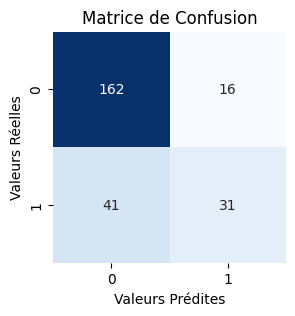

In [ ]:
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_mat_RFR, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()

In [ ]:
#Les mesures de performances du modèle
total=sum(sum(confusion_mat_RFR))
precision_rfr = confusion_mat_RFR[0,0]/(confusion_mat_RFR[0,0]+confusion_mat_RFR[0,1])
accuracy_rfr = (confusion_mat_RFR[0,0]+confusion_mat_RFR[1,1])/(confusion_mat_RFR[0,0]+confusion_mat_RFR[0,1]+confusion_mat_RFR[1,0]+confusion_mat_RFR[1,1])
nmi_rfr = nmi(Y_test,Y_test_pred_rfr)
recall_rfr = recall_score(Y_test,Y_test_pred_rfr)
f_score_rfr = f1(Y_test,Y_test_pred_rfr)

test_accuracy.append(accuracy_rfr)
test_precision.append(precision_rfr)
test_recall.append(recall_rfr)
test_NMI.append(nmi_rfr)
test_F_score.append(f_score_rfr)


print('Accuracy: ', accuracy_rfr)
print('Precision: ', precision_rfr)
print("Recall:",recall_rfr)
print('NMI: ',nmi_rfr)
print("F-score: ", f_score_rfr)


Accuracy:  0.772
Precision:  0.9101123595505618
Recall: 0.9101123595505618
NMI:  0.13149594337714884
F-score:  0.8503937007874016


###Decision Tree

In [ ]:
# Create Decision Tree classifer object
DT = DecisionTreeClassifier()
# Train Decision Tree Classifer
DT = DT.fit(X_train,Y_train)
#Predict the response for test dataset
y_pred_dec = DT.predict(X_test)

print("Accuracy:",accuracy_score(Y_test, y_pred_dec))

Accuracy: 0.7


En modifiant les paramètres du modèles on pourra améliorer l'accuracy

In [ ]:
# Create Decision Tree classifer object
DT = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
DT = DT.fit(X_train,Y_train)
#Predict the response for test dataset
y_pred_D = DT.predict(X_test)

confusion_mat_DT = confusion_matrix(Y_test, y_pred_D)

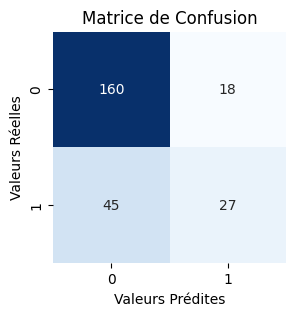

In [ ]:
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_mat_DT, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()

In [ ]:
accuracy_D=accuracy_score(Y_test, y_pred_D)
precision_D=precision_score(Y_test, y_pred_D)
recall_D = recall_score(Y_test,y_pred_D)
nmi_D = nmi(Y_test,y_pred_D)
f_score_D = f1(Y_test,y_pred_D)


test_accuracy.append(accuracy_D)
test_precision.append(precision_D)
test_recall.append(recall_D)
test_NMI.append(nmi_D)
test_F_score.append(f_score_D)


#Les mesures de performances du modèle
print("Accuracy:",accuracy_D)
print("Precision:",precision_D)
print("Recall:",recall_D)
print('NMI: ',nmi_D)
print("F-score: ", f_score_D)

Accuracy: 0.748
Precision: 0.7804878048780488
Recall: 0.898876404494382
NMI:  0.08892303523529485
F-score:  0.835509138381201


On peut afficher l'arbre de décision obtenu comme suit:

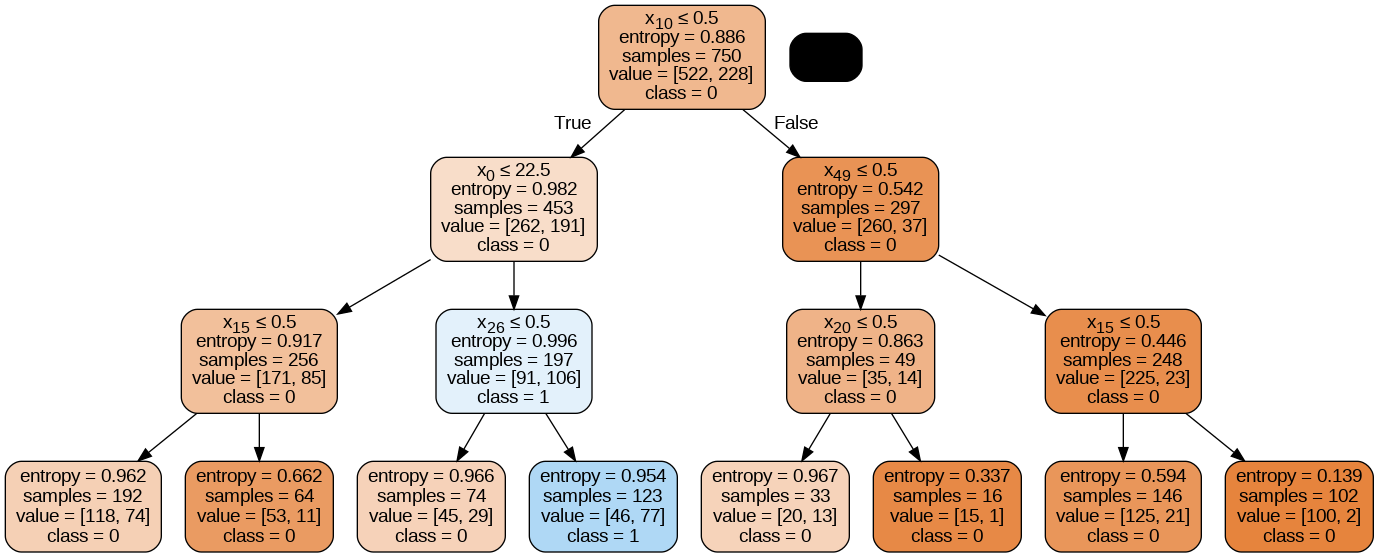

In [ ]:
#Affichage de l'arbre
dot_data = StringIO()
export_graphviz(DT, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('credits.png')
Image(graph.create_png())

###Naive Bayes

In [ ]:
GNB = GaussianNB()

# Fitting with train data
model_NB = GNB.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred_nb = model_NB.predict(X_test)

mat_conf_nb=confusion_matrix(Y_test, y_pred_nb)


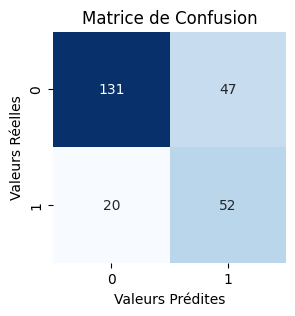

In [ ]:
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(mat_conf_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()

In [ ]:
accuracy_nb=accuracy_score(Y_test, y_pred_nb)
precision_nb=precision_score(Y_test, y_pred_nb)
recall_nb = recall_score(Y_test,y_pred_nb)
nmi_nb = nmi(Y_test,y_pred_nb)
f_score_nb = f1(Y_test,y_pred_nb)


test_accuracy.append(accuracy_nb)
test_precision.append(precision_nb)
test_recall.append(recall_nb)
test_NMI.append(nmi_nb)
test_F_score.append(f_score_nb)


print("Accuracy:",accuracy_nb)
print("Precision:",precision_nb)
print("Recall:",recall_nb)
print('NMI: ',nmi_nb)
print("F-score: ", f_score_nb)

Accuracy: 0.732
Precision: 0.8675496688741722
Recall: 0.7359550561797753
NMI:  0.14184884299818223
F-score:  0.7963525835866261


###LDA

In [ ]:
# Create a pipeline with scaling and LDA
pipeline_lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis())

# Fit the model
try:
    pipeline_lda.fit(X_train, Y_train)
except Exception as e:
    print(f"An error occurred: {e}")
# summarize

y_pred_lda = pipeline_lda.predict(X_test)

confusion_mat_LDA=confusion_matrix(Y_test, y_pred_lda)


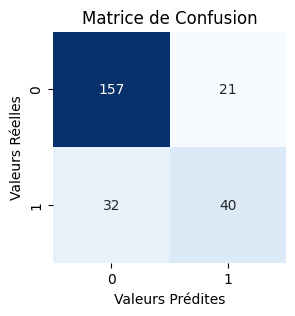

In [ ]:
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_mat_LDA, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()

In [ ]:
accuracy_lda=accuracy_score(Y_test, y_pred_lda)
precision_lda=precision_score(Y_test, y_pred_lda)
recall_lda = recall_score(Y_test,y_pred_lda)
nmi_lda = nmi(Y_test,y_pred_lda)
f_score_lda = f1(Y_test,y_pred_lda)


test_accuracy.append(accuracy_lda)
test_precision.append(precision_lda)
test_recall.append(recall_lda)
test_NMI.append(nmi_lda)
test_F_score.append(f_score_lda)



print("Accuracy:",accuracy_lda)
print("Precision:",precision_lda)
print("Recall:",recall_lda)
print('NMI: ',nmi_lda)
print("F-score: ", f_score_lda)

Accuracy: 0.788
Precision: 0.8306878306878307
Recall: 0.8820224719101124
NMI:  0.17203207667840692
F-score:  0.8555858310626703


###QDA

In [ ]:
model_QDA = QuadraticDiscriminantAnalysis()
model_QDA.fit(X_train, Y_train)
y_pred_qda = model_QDA.predict(X_test)

confusion_mat_QDA=confusion_matrix(Y_test, y_pred_qda)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


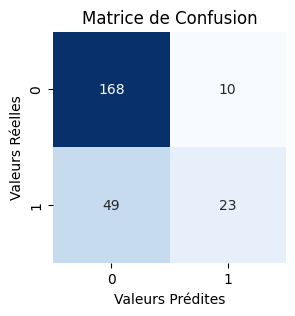

In [ ]:
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_mat_QDA, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()

In [ ]:
accuracy_qda=accuracy_score(Y_test, y_pred_qda)
precision_qda=precision_score(Y_test, y_pred_qda)
recall_qda = recall_score(Y_test,y_pred_qda)
nmi_qda = nmi(Y_test,y_pred_qda)
f_score_qda = f1(Y_test,y_pred_qda)


test_accuracy.append(accuracy_qda)
test_precision.append(precision_qda)
test_recall.append(recall_qda)
test_NMI.append(nmi_qda)
test_F_score.append(f_score_qda)



print("Accuracy:",accuracy_qda)
print("Precision:",precision_qda)
print("Recall:",recall_qda)
print('NMI: ',nmi_qda)
print("F-score: ", f_score_qda)

Accuracy: 0.764
Precision: 0.7741935483870968
Recall: 0.9438202247191011
NMI:  0.11252797908632814
F-score:  0.8506329113924052


###Logistic Regression

In [ ]:
# define (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,Y_train)

y_pred_log=logreg.predict(X_test)

confusion_mat_LOG=confusion_matrix(Y_test, y_pred_log)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


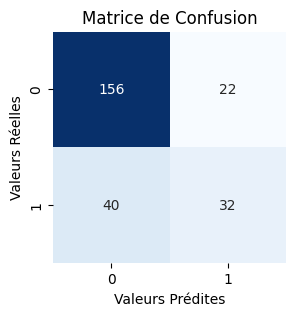

In [ ]:
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_mat_LOG, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()

In [ ]:
accuracy_log=accuracy_score(Y_test, y_pred_log)
precision_log=precision_score(Y_test, y_pred_log)
recall_log = recall_score(Y_test,y_pred_log)
nmi_log = nmi(Y_test,y_pred_log)
f_score_log = f1(Y_test,y_pred_log)


test_accuracy.append(accuracy_log)
test_precision.append(precision_log)
test_recall.append(recall_log)
test_NMI.append(nmi_log)
test_F_score.append(f_score_log)



print("Accuracy:",accuracy_log)
print("Precision:",precision_log)
print("Recall:",recall_log)
print('NMI: ',nmi_log)
print("F-score: ", f_score_log)

Accuracy: 0.752
Precision: 0.7959183673469388
Recall: 0.8764044943820225
NMI:  0.10274125749562035
F-score:  0.8342245989304812


###KNN

In [ ]:
# test for k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
y_pred_knn = knn.predict(X_test)
print(accuracy_score(Y_test, y_pred_knn))

0.596


Text(0, 0.5, 'Accuracy')

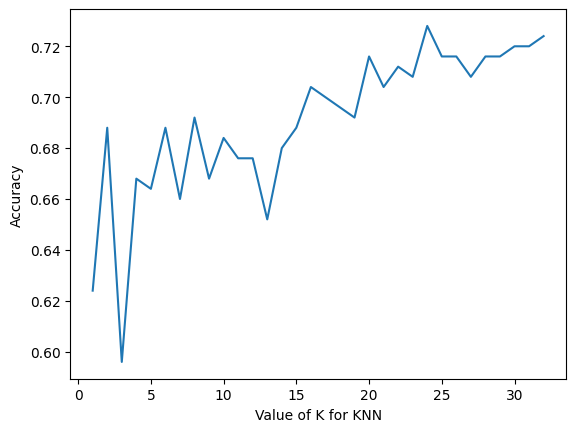

In [ ]:
# try K=1 through K=30 and record testing accuracy
k_range = list(range(1, 33))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred_knn = knn.predict(X_test)
    scores.append(accuracy_score(Y_test, y_pred_knn))

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')

In [ ]:
#Select the model with best result
knn = KNeighborsClassifier(n_neighbors=33)
knn=knn.fit(X_train, Y_train)
y_pred_kn = knn.predict(X_test)

confusion_mat_knn=confusion_matrix(Y_test, y_pred_kn)

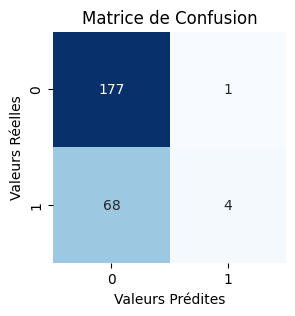

In [ ]:
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_mat_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()

In [ ]:
accuracy_kn=accuracy_score(Y_test, y_pred_kn)
precision_kn=precision_score(Y_test, y_pred_kn)
recall_kn = recall_score(Y_test,y_pred_kn)
nmi_kn = nmi(Y_test,y_pred_kn)
f_score_kn = f1(Y_test,y_pred_kn)


test_accuracy.append(accuracy_kn)
test_precision.append(precision_kn)
test_recall.append(recall_kn)
test_NMI.append(nmi_kn)
test_F_score.append(f_score_kn)



print("Accuracy:",accuracy_kn)
print("Precision:",precision_kn)
print("Recall:",recall_kn)
print('NMI: ',nmi_kn)
print("F-score: ", f_score_kn)

Accuracy: 0.724
Precision: 0.7224489795918367
Recall: 0.9943820224719101
NMI:  0.0330193573014295
F-score:  0.8368794326241134


###SVM

In [ ]:
#Create a svm Classifier
svm = SVC(kernel='linear')

#Train the model using the training sets
svm.fit(X_train, Y_train)

#Predict the response for test dataset
y_pred_svm = svm.predict(X_test)

confusion_mat_svm = confusion_matrix(Y_test, y_pred_svm)

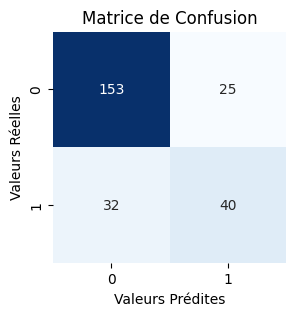

In [ ]:
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_mat_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()

In [ ]:
accuracy_svm=accuracy_score(Y_test, y_pred_svm)
precision_svm=precision_score(Y_test, y_pred_svm)
recall_svm = recall_score(Y_test,y_pred_svm)
nmi_svm = nmi(Y_test,y_pred_svm)
f_score_svm = f1(Y_test,y_pred_svm)


test_accuracy.append(accuracy_svm)
test_precision.append(precision_svm)
test_recall.append(recall_svm)
test_NMI.append(nmi_svm)
test_F_score.append(f_score_svm)



print("Accuracy:",accuracy_svm)
print("Precision:",precision_svm)
print("Recall:",recall_svm)
print('NMI: ',nmi_svm)
print("F-score: ", f_score_svm)

Accuracy: 0.772
Precision: 0.827027027027027
Recall: 0.8595505617977528
NMI:  0.14708895444198994
F-score:  0.8429752066115702


###Xgboost

In [ ]:
xgb = XGBClassifier(random_state = 12345)

xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000]}


#Appliquer labelEncoding sur le output pour avoir des classes (0 = Oui) or (1 = Non)
Y_train_xgb = LabelEncoder().fit_transform(Y_train)
Y_test_xgb = LabelEncoder().fit_transform(Y_test)

xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, Y_train_xgb)

#xgb_tuned = XGBClassifier(**xgb_cv_model.best_params_).fit(X,y)
#cross_val_score(xgb_tuned, X, y, cv = 10).mean()


# Get the best parameters and the best score
best_params_xgb = xgb_cv_model.best_params_
best_score_xgb = xgb_cv_model.best_score_
best_model_xgb = xgb_cv_model.best_estimator_

print("Best parameters:", best_params_xgb)
print("Best cross-validation score:", best_score_xgb)

#Predict the response for test dataset
y_pred_xgb = best_model_xgb.predict(X_test)
confusion_mat_xgb = confusion_matrix(Y_test_xgb, y_pred_xgb)


Fitting 5 folds for each of 720 candidates, totalling 3600 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:59:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 0.1, 'n_estimators': 1000, 'subsample': 0.9}
Best cross-validation score: 0.7666666666666668


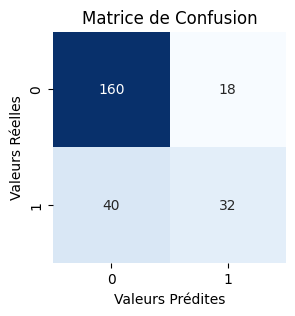

In [ ]:
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_mat_xgb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()

In [ ]:
# Evaluate the model on the test set using best parameters
accuracy_xgb=accuracy_score(Y_test_xgb, y_pred_xgb)
precision_xgb=precision_score(Y_test_xgb, y_pred_xgb)
recall_xgb = recall_score(Y_test_xgb,y_pred_xgb)
nmi_xgb = nmi(Y_test_xgb,y_pred_xgb)
f_score_xgb = f1(Y_test_xgb,y_pred_xgb)


test_accuracy.append(accuracy_xgb)
test_precision.append(precision_xgb)
test_recall.append(recall_xgb)
test_NMI.append(nmi_xgb)
test_F_score.append(f_score_xgb)



print("Accuracy:",accuracy_xgb)
print("Precision:",precision_xgb)
print("Recall:",recall_xgb)
print('NMI: ',nmi_xgb)
print("F-score: ", f_score_xgb)

Accuracy: 0.768
Precision: 0.64
Recall: 0.4444444444444444
NMI:  0.1259966068255191
F-score:  0.5245901639344263


###Gradient Boosting

In [ ]:
# Initialize Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()

# Define the grid of parameters to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(gb_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best parameters, the best score and the best model
best_params_gb = grid_search.best_params_
best_score_gb = grid_search.best_score_
best_model_gb = grid_search.best_estimator_

print("Best parameters:", best_params_gb)
print("Best cross-validation score:", best_score_gb)

#Predict the response for test dataset
y_pred_gb = best_model_gb.predict(X_test)
confusion_mat_gb = confusion_matrix(Y_test, y_pred_gb)

Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}
Best cross-validation score: 0.7426666666666666


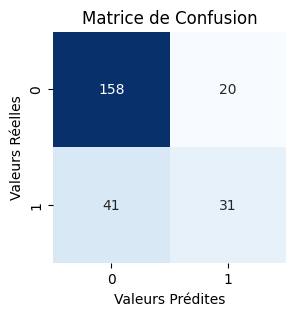

In [ ]:
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_mat_gb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()

In [ ]:
# Evaluate the model on the test set using best parameters
accuracy_gb=accuracy_score(Y_test, y_pred_gb)
precision_gb=precision_score(Y_test, y_pred_gb)
recall_gb = recall_score(Y_test,y_pred_gb)
nmi_gb = nmi(Y_test,y_pred_gb)
f_score_gb = f1(Y_test,y_pred_gb)


test_accuracy.append(accuracy_gb)
test_precision.append(precision_gb)
test_recall.append(recall_gb)
test_NMI.append(nmi_gb)
test_F_score.append(f_score_gb)



print("Accuracy:",accuracy_gb)
print("Precision:",precision_gb)
print("Recall:",recall_gb)
print('NMI: ',nmi_gb)
print("F-score: ", f_score_gb)

Accuracy: 0.756
Precision: 0.7939698492462312
Recall: 0.8876404494382022
NMI:  0.10639013703924662
F-score:  0.8381962864721486


###Adaboost

In [ ]:

# Initialize AdaBoostClassifier
ada_clf = AdaBoostClassifier()

# Define the grid of parameters to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(ada_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best parameters, the best score and the best model
best_params_ada = grid_search.best_params_
best_score_ada = grid_search.best_score_
best_model_ada = grid_search.best_estimator_

print("Best parameters:", best_params_ada)
print("Best cross-validation score:", best_score_ada)

#Predict the response for test dataset
y_pred_ada = best_model_ada.predict(X_test)
confusion_mat_ada = confusion_matrix(Y_test, y_pred_ada)

Best parameters: {'learning_rate': 0.1, 'n_estimators': 150}
Best cross-validation score: 0.7413333333333333


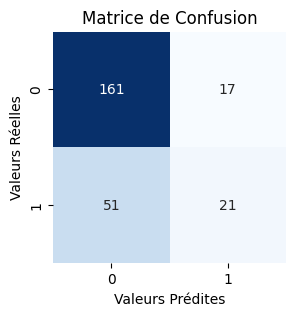

In [ ]:
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_mat_ada, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()

In [ ]:
# Evaluate the model on the test set using best parameters
accuracy_ada=accuracy_score(Y_test, y_pred_ada)
precision_ada=precision_score(Y_test, y_pred_ada)
recall_ada = recall_score(Y_test,y_pred_ada)
nmi_ada = nmi(Y_test,y_pred_ada)
f_score_ada = f1(Y_test,y_pred_ada)


test_accuracy.append(accuracy_ada)
test_precision.append(precision_ada)
test_recall.append(recall_ada)
test_NMI.append(nmi_ada)
test_F_score.append(f_score_ada)



print("Accuracy:",accuracy_ada)
print("Precision:",precision_ada)
print("Recall:",recall_ada)
print('NMI: ',nmi_ada)
print("F-score: ", f_score_ada)

Accuracy: 0.728
Precision: 0.7594339622641509
Recall: 0.9044943820224719
NMI:  0.05449154516568949
F-score:  0.8256410256410257


###ExtraTreesClassifier

In [ ]:
# Define the ExtraTreesClassifier
et_classifier = ExtraTreesClassifier(random_state=42)

# Define the hyperparameters grid to search through
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=et_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to find the best parameters
grid_search.fit(X_train, Y_train)

# Get the best parameters, the best score and the best model
best_params_et = grid_search.best_params_
best_score_et = grid_search.best_score_
best_classifier_et = grid_search.best_estimator_

print("Best Parameters:", best_params_et)
print("Best Score:", best_score_et)

#Predict the response for test dataset
y_pred_et = best_classifier_et.predict(X_test)
confusion_mat_et = confusion_matrix(Y_test, y_pred_et)

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.764


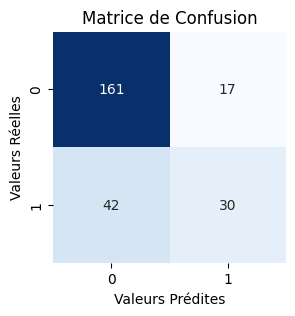

In [ ]:
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_mat_et, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()

In [ ]:
# Evaluate the model on the test set using best parameters
accuracy_et=accuracy_score(Y_test, y_pred_et)
precision_et=precision_score(Y_test, y_pred_et)
recall_et = recall_score(Y_test,y_pred_et)
nmi_et = nmi(Y_test,y_pred_et)
f_score_et = f1(Y_test,y_pred_et)


test_accuracy.append(accuracy_et)
test_precision.append(precision_et)
test_recall.append(recall_et)
test_NMI.append(nmi_et)
test_F_score.append(f_score_et)



print("Accuracy:",accuracy_et)
print("Precision:",precision_et)
print("Recall:",recall_et)
print('NMI: ',nmi_et)
print("F-score: ", f_score_et)

Accuracy: 0.764
Precision: 0.7931034482758621
Recall: 0.9044943820224719
NMI:  0.11692822359552682
F-score:  0.8451443569553805


##Comparaison entre les méthodes de classification supervisées

In [ ]:
data = {
    'Model': models * 5,
    'Metric': ['Accuracy'] * 12 + ['Precision'] * 12 + ['Recall'] * 12 + ['NMI'] * 12 + ['F-score'] * 12,
    'Score': test_accuracy + test_precision + test_recall + test_NMI + test_F_score
}

df = pd.DataFrame(data)

fig = px.bar(df, x='Model', y='Score', color='Metric', barmode='group', title='Scores des métriques pour différents modèles')
fig.update_xaxes(tickangle=45)
fig.show()

###**Interprétation des résultats**

**LinearDiscriminantAnalysis, RandomForest, QuadraticDiscriminantAnalysis, SVM, LogisticRegression, GradientBoostingClassifier, AdaBoostClassifier et ExtraTreesClassifier** se démarquent généralement comme des modèles plus performants selon plusieurs métriques, notamment l'exactitude, la précision, le rappel, le NMI et le score F. Ces modèles démontrent une performance plus équilibrée selon différents critères d'évaluation.

**GaussianNB, DecisionTree, KNN et XGBClassifier** présentent des performances plus faibles par rapport à d'autres modèles selon la plupart des métriques, ce qui pourrait indiquer des limitations potentielles dans la prédiction précise du risque de crédit sur cet ensemble de données.




**Compromis :** Certains modèles pourraient exceller dans une métrique mais être moins performants dans d'autres. Une analyse des compromis est essentielle en fonction des besoins spécifiques de l'institution bancaire. Par exemple, si la réduction des faux positifs (précision) est cruciale, des modèles comme GaussianNB et SVM pourraient être considérés malgré des scores légèrement inférieurs dans d'autres métriques.

#Classification supervisée (balanced data)

### Appliquer la méthode SMOTE pour équilibrer les données d'entrainement et de test

In [ ]:
# Apply the SMOTE over−sampling
smote_strategy = SMOTE(sampling_strategy='auto')
X_resampled_train , y_resampled_train = smote_strategy.fit_resample(X_train, Y_train)
X_resampled_test , y_resampled_test = smote_strategy.fit_resample(X_test, Y_test)

###Définir les variables de stockage des scores

In [ ]:
#variables de stockages des scores pour le cas balanced data (bd)
test_accuracy_bd=[]
test_precision_bd=[]
test_recall_bd=[]
test_NMI_bd=[]
test_F_score_bd=[]

###Random Forest

In [ ]:
random_forest = RandomForestClassifier( random_state = 100)
rf=random_forest.fit(X_resampled_train, y_resampled_train)
y_test_rfr=rf.predict(X_resampled_test)

confusion_mat_RFR = confusion_matrix(y_resampled_test, y_test_rfr)

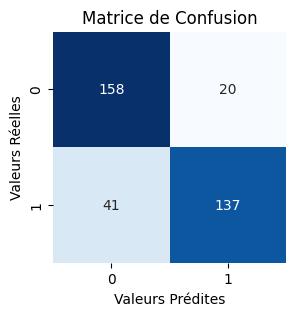

In [ ]:
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_mat_RFR, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()

In [ ]:
#Les mesures de performances du modèle
total=sum(sum(confusion_mat_RFR))
accuracy_rfr = (confusion_mat_RFR[0,0]+confusion_mat_RFR[1,1])/(confusion_mat_RFR[0,0]+confusion_mat_RFR[0,1]+confusion_mat_RFR[1,0]+confusion_mat_RFR[1,1])
precision_rfr = confusion_mat_RFR[0,0]/(confusion_mat_RFR[0,0]+confusion_mat_RFR[0,1])
recall_rfr = recall_score(y_resampled_test,y_test_rfr)
nmi_rfr = nmi(y_resampled_test,y_test_rfr)
f_score_rfr = f1(y_resampled_test,y_test_rfr)

test_accuracy_bd.append(accuracy_rfr)
test_precision_bd.append(precision_rfr)
test_recall_bd.append(recall_rfr)
test_NMI_bd.append(nmi_rfr)
test_F_score_bd.append(f_score_rfr)

print('Accuracy: ', accuracy_rfr)
print('Precision: ', precision_rfr)
print("Recall:",recall_rfr)
print('NMI: ',nmi_rfr)
print("F-score: ", f_score_rfr)


Accuracy:  0.8286516853932584
Precision:  0.8876404494382022
Recall: 0.8876404494382022
NMI:  0.34889656947109887
F-score:  0.8381962864721486


###Decision Tree

In [ ]:
# Create Decision Tree classifer object
DT = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
DT = DT.fit(X_resampled_train,y_resampled_train)
#Predict the response for test dataset
y_pred_D = DT.predict(X_resampled_test)

confusion_mat_DT = confusion_matrix(y_resampled_test, y_pred_D)

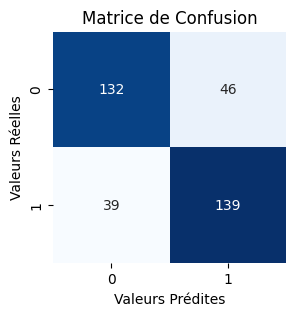

In [ ]:
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_mat_DT, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()

In [ ]:
accuracy_D=accuracy_score(y_resampled_test, y_pred_D)
precision_D=precision_score(y_resampled_test, y_pred_D)
recall_D = recall_score(y_resampled_test,y_pred_D)
nmi_D = nmi(y_resampled_test,y_pred_D)
f_score_D = f1(y_resampled_test,y_pred_D)


test_accuracy_bd.append(accuracy_D)
test_precision_bd.append(precision_D)
test_recall_bd.append(recall_D)
test_NMI_bd.append(nmi_D)
test_F_score_bd.append(f_score_D)


#Les mesures de performances du modèle
print("Accuracy:",accuracy_D)
print("Precision:",precision_D)
print("Recall:",recall_D)
print('NMI: ',nmi_D)
print("F-score: ", f_score_D)

Accuracy: 0.7612359550561798
Precision: 0.7719298245614035
Recall: 0.7415730337078652
NMI:  0.207556867969816
F-score:  0.7564469914040114


###Naive Bayes

In [ ]:
GNB = GaussianNB()

# Fitting with train data
model_NB = GNB.fit(X_resampled_train, y_resampled_train)

#Predict the response for test dataset
y_pred_nb = model_NB.predict(X_resampled_test)

mat_conf_nb=confusion_matrix(y_resampled_test, y_pred_nb)


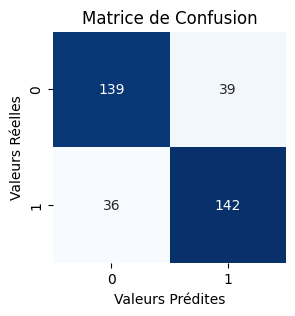

In [ ]:
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(mat_conf_nb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()

In [ ]:
accuracy_nb=accuracy_score(y_resampled_test, y_pred_nb)
precision_nb=precision_score(y_resampled_test, y_pred_nb)
recall_nb = recall_score(y_resampled_test,y_pred_nb)
nmi_nb = nmi(y_resampled_test,y_pred_nb)
f_score_nb = f1(y_resampled_test,y_pred_nb)


test_accuracy_bd.append(accuracy_nb)
test_precision_bd.append(precision_nb)
test_recall_bd.append(recall_nb)
test_NMI_bd.append(nmi_nb)
test_F_score_bd.append(f_score_nb)


print("Accuracy:",accuracy_nb)
print("Precision:",precision_nb)
print("Recall:",recall_nb)
print('NMI: ',nmi_nb)
print("F-score: ", f_score_nb)

Accuracy: 0.7893258426966292
Precision: 0.7942857142857143
Recall: 0.7808988764044944
NMI:  0.2573601785938561
F-score:  0.7875354107648725


###LDA

In [ ]:
# Create a pipeline with scaling and LDA
pipeline_lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis())

# Fit the model
try:
    pipeline_lda.fit(X_resampled_train, y_resampled_train)
except Exception as e:
    print(f"An error occurred: {e}")
# summarize

y_pred_lda = pipeline_lda.predict(X_resampled_test)

confusion_mat_LDA=confusion_matrix(y_resampled_test, y_pred_lda)


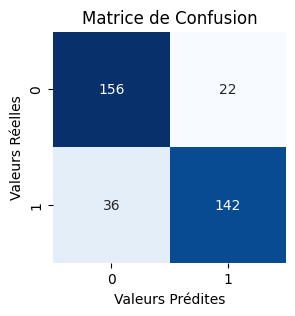

In [ ]:
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_mat_LDA, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()

In [ ]:
accuracy_lda=accuracy_score(y_resampled_test, y_pred_lda)
precision_lda=precision_score(y_resampled_test, y_pred_lda)
recall_lda = recall_score(y_resampled_test,y_pred_lda)
nmi_lda = nmi(y_resampled_test,y_pred_lda)
f_score_lda = f1(y_resampled_test,y_pred_lda)


test_accuracy_bd.append(accuracy_lda)
test_precision_bd.append(precision_lda)
test_recall_bd.append(recall_lda)
test_NMI_bd.append(nmi_lda)
test_F_score_bd.append(f_score_lda)



print("Accuracy:",accuracy_lda)
print("Precision:",precision_lda)
print("Recall:",recall_lda)
print('NMI: ',nmi_lda)
print("F-score: ", f_score_lda)

Accuracy: 0.8370786516853933
Precision: 0.8125
Recall: 0.8764044943820225
NMI:  0.36334045186059716
F-score:  0.8432432432432433


###QDA

In [ ]:
model_QDA = QuadraticDiscriminantAnalysis()
model_QDA.fit(X_resampled_train, y_resampled_train)
y_pred_qda = model_QDA.predict(X_resampled_test)

confusion_mat_QDA=confusion_matrix(y_resampled_test, y_pred_qda)

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning:

Variables are collinear



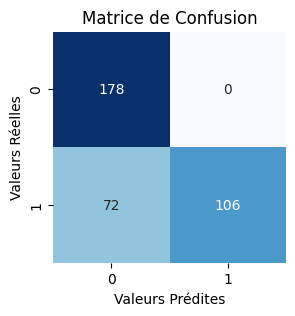

In [ ]:
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_mat_QDA, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()

In [ ]:
accuracy_qda=accuracy_score(y_resampled_test, y_pred_qda)
precision_qda=precision_score(y_resampled_test, y_pred_qda)
recall_qda = recall_score(y_resampled_test,y_pred_qda)
nmi_qda = nmi(y_resampled_test,y_pred_qda)
f_score_qda = f1(y_resampled_test,y_pred_qda)


test_accuracy_bd.append(accuracy_qda)
test_precision_bd.append(precision_qda)
test_recall_bd.append(recall_qda)
test_NMI_bd.append(nmi_qda)
test_F_score_bd.append(f_score_qda)



print("Accuracy:",accuracy_qda)
print("Precision:",precision_qda)
print("Recall:",recall_qda)
print('NMI: ',nmi_qda)
print("F-score: ", f_score_qda)

Accuracy: 0.797752808988764
Precision: 0.712
Recall: 1.0
NMI:  0.4171003829042086
F-score:  0.8317757009345794


###Logistic Regression

In [ ]:
# define (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_resampled_train,y_resampled_train)

y_pred_log=logreg.predict(X_resampled_test)

confusion_mat_LOG=confusion_matrix(y_resampled_test, y_pred_log)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



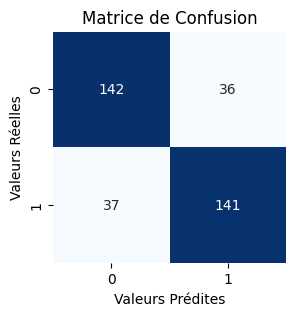

In [ ]:
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_mat_LOG, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()

In [ ]:
accuracy_log=accuracy_score(y_resampled_test, y_pred_log)
precision_log=precision_score(y_resampled_test, y_pred_log)
recall_log = recall_score(y_resampled_test,y_pred_log)
nmi_log = nmi(y_resampled_test,y_pred_log)
f_score_log = f1(y_resampled_test,y_pred_log)


test_accuracy_bd.append(accuracy_log)
test_precision_bd.append(precision_log)
test_recall_bd.append(recall_log)
test_NMI_bd.append(nmi_log)
test_F_score_bd.append(f_score_log)



print("Accuracy:",accuracy_log)
print("Precision:",precision_log)
print("Recall:",recall_log)
print('NMI: ',nmi_log)
print("F-score: ", f_score_log)

Accuracy: 0.7949438202247191
Precision: 0.7932960893854749
Recall: 0.797752808988764
NMI:  0.2680892870349536
F-score:  0.7955182072829132


###KNN

Text(0, 0.5, 'Accuracy')

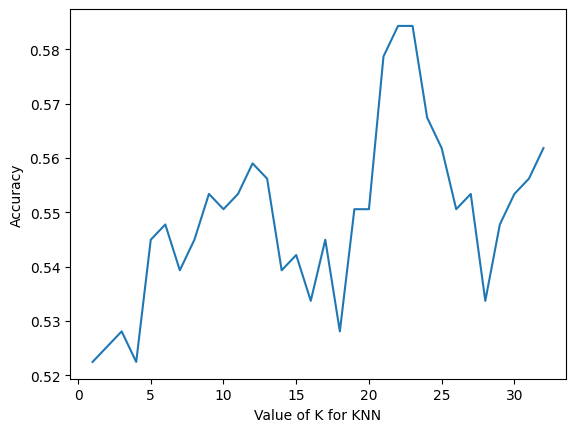

In [ ]:
# try K=1 through K=30 and record testing accuracy
k_range = list(range(1, 33))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_resampled_train, y_resampled_train)
    y_pred_knn = knn.predict(X_resampled_test)
    scores.append(accuracy_score(y_resampled_test, y_pred_knn))

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')

In [ ]:
#Select the model with best result
knn = KNeighborsClassifier(n_neighbors=22)
knn=knn.fit(X_resampled_train, y_resampled_train)
y_pred_kn = knn.predict(X_resampled_test)

confusion_mat_knn=confusion_matrix(y_resampled_test, y_pred_kn)

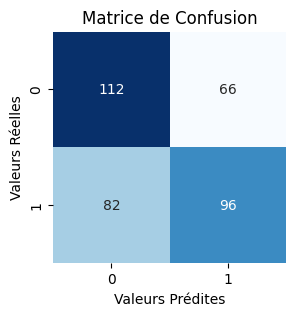

In [ ]:
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_mat_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()

In [ ]:
accuracy_kn=accuracy_score(y_resampled_test, y_pred_kn)
precision_kn=precision_score(y_resampled_test, y_pred_kn)
recall_kn = recall_score(y_resampled_test,y_pred_kn)
nmi_kn = nmi(y_resampled_test,y_pred_kn)
f_score_kn = f1(y_resampled_test,y_pred_kn)


test_accuracy_bd.append(accuracy_kn)
test_precision_bd.append(precision_kn)
test_recall_bd.append(recall_kn)
test_NMI_bd.append(nmi_kn)
test_F_score_bd.append(f_score_kn)



print("Accuracy:",accuracy_kn)
print("Precision:",precision_kn)
print("Recall:",recall_kn)
print('NMI: ',nmi_kn)
print("F-score: ", f_score_kn)

Accuracy: 0.5842696629213483
Precision: 0.5773195876288659
Recall: 0.6292134831460674
NMI:  0.02082097053369891
F-score:  0.6021505376344086


###SVM

In [ ]:
#Create a svm Classifier
svm = SVC(kernel='linear')

#Train the model using the training sets
svm.fit(X_resampled_train, y_resampled_train)

#Predict the response for test dataset
y_pred_svm = svm.predict(X_resampled_test)

confusion_mat_svm = confusion_matrix(y_resampled_test, y_pred_svm)

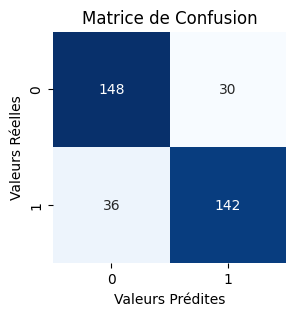

In [ ]:
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_mat_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()

In [ ]:
accuracy_svm=accuracy_score(y_resampled_test, y_pred_svm)
precision_svm=precision_score(y_resampled_test, y_pred_svm)
recall_svm = recall_score(y_resampled_test,y_pred_svm)
nmi_svm = nmi(y_resampled_test,y_pred_svm)
f_score_svm = f1(y_resampled_test,y_pred_svm)


test_accuracy_bd.append(accuracy_svm)
test_precision_bd.append(precision_svm)
test_recall_bd.append(recall_svm)
test_NMI_bd.append(nmi_svm)
test_F_score_bd.append(f_score_svm)



print("Accuracy:",accuracy_svm)
print("Precision:",precision_svm)
print("Recall:",recall_svm)
print('NMI: ',nmi_svm)
print("F-score: ", f_score_svm)

Accuracy: 0.8146067415730337
Precision: 0.8043478260869565
Recall: 0.8314606741573034
NMI:  0.3089307524815612
F-score:  0.8176795580110497


###Xgboost

In [ ]:
xgb = XGBClassifier(random_state = 12345)

xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000]}

#Appliquer labelEncoding sur le output pour avoir des classes (0 = Oui) or (1 = Non)
Y_resampled_train_xgb = LabelEncoder().fit_transform(y_resampled_train)
Y_resampled_test_xgb = LabelEncoder().fit_transform(y_resampled_test)

xgb_cv_model  = GridSearchCV(xgb,xgb_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_resampled_train, Y_resampled_train_xgb)

#xgb_tuned = XGBClassifier(**xgb_cv_model.best_params_).fit(X,y)
#cross_val_score(xgb_tuned, X, y, cv = 10).mean()


# Get the best parameters and the best score
best_params_xgb = xgb_cv_model.best_params_
best_score_xgb = xgb_cv_model.best_score_
best_model_xgb = xgb_cv_model.best_estimator_

print("Best parameters:", best_params_xgb)
print("Best cross-validation score:", best_score_xgb)

#Predict the response for test dataset
y_pred_xgb = best_model_xgb.predict(X_resampled_test)
confusion_mat_xgb = confusion_matrix(Y_resampled_test_xgb, y_pred_xgb)


Fitting 5 folds for each of 720 candidates, totalling 3600 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[17:28:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_split" } are not used.




Best parameters: {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_split': 0.1, 'n_estimators': 100, 'subsample': 0.5}
Best cross-validation score: 0.8161667280088333


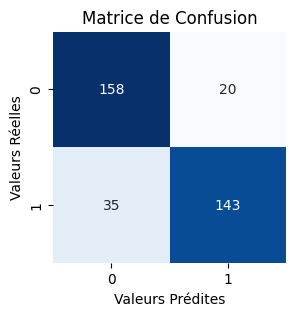

In [ ]:
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_mat_xgb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()

In [ ]:
# Evaluate the model on the test set using best parameters
accuracy_xgb=accuracy_score(Y_resampled_test_xgb, y_pred_xgb)
precision_xgb=precision_score(Y_resampled_test_xgb, y_pred_xgb)
recall_xgb = recall_score(Y_resampled_test_xgb,y_pred_xgb)
nmi_xgb = nmi(Y_resampled_test_xgb,y_pred_xgb)
f_score_xgb = f1(Y_resampled_test_xgb,y_pred_xgb)


test_accuracy_bd.append(accuracy_xgb)
test_precision_bd.append(precision_xgb)
test_recall_bd.append(recall_xgb)
test_NMI_bd.append(nmi_xgb)
test_F_score_bd.append(f_score_xgb)



print("Accuracy:",accuracy_xgb)
print("Precision:",precision_xgb)
print("Recall:",recall_xgb)
print('NMI: ',nmi_xgb)
print("F-score: ", f_score_xgb)

Accuracy: 0.8455056179775281
Precision: 0.8773006134969326
Recall: 0.8033707865168539
NMI:  0.38479440323934316
F-score:  0.8387096774193549


###Gradient Boosting

In [ ]:
# Initialize Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()

# Define the grid of parameters to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(gb_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled_train, y_resampled_train)

# Get the best parameters, the best score and the best model
best_params_gb = grid_search.best_params_
best_score_gb = grid_search.best_score_
best_model_gb = grid_search.best_estimator_

print("Best parameters:", best_params_gb)
print("Best cross-validation score:", best_score_gb)

#Predict the response for test dataset
y_pred_gb = best_model_gb.predict(X_resampled_test)
confusion_mat_gb = confusion_matrix(y_resampled_test, y_pred_gb)

Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
Best cross-validation score: 0.7960710342289289


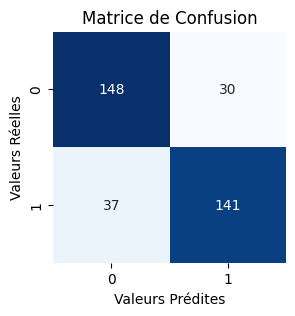

In [ ]:
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_mat_gb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()

In [ ]:
# Evaluate the model on the test set using best parameters
accuracy_gb=accuracy_score(y_resampled_test, y_pred_gb)
precision_gb=precision_score(y_resampled_test, y_pred_gb)
recall_gb = recall_score(y_resampled_test,y_pred_gb)
nmi_gb = nmi(y_resampled_test,y_pred_gb)
f_score_gb = f1(y_resampled_test,y_pred_gb)


test_accuracy_bd.append(accuracy_gb)
test_precision_bd.append(precision_gb)
test_recall_bd.append(recall_gb)
test_NMI_bd.append(nmi_gb)
test_F_score_bd.append(f_score_gb)



print("Accuracy:",accuracy_gb)
print("Precision:",precision_gb)
print("Recall:",recall_gb)
print('NMI: ',nmi_gb)
print("F-score: ", f_score_gb)

Accuracy: 0.8117977528089888
Precision: 0.8
Recall: 0.8314606741573034
NMI:  0.3031859581135554
F-score:  0.8154269972451791


###Adaboost

In [ ]:

# Initialize AdaBoostClassifier
ada_clf = AdaBoostClassifier()

# Define the grid of parameters to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(ada_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled_train, y_resampled_train)

# Get the best parameters, the best score and the best model
best_params_ada = grid_search.best_params_
best_score_ada = grid_search.best_score_
best_model_ada = grid_search.best_estimator_

print("Best parameters:", best_params_ada)
print("Best cross-validation score:", best_score_ada)

#Predict the response for test dataset
y_pred_ada = best_model_ada.predict(X_resampled_test)
confusion_mat_ada = confusion_matrix(y_resampled_test, y_pred_ada)

Best parameters: {'learning_rate': 1.0, 'n_estimators': 50}
Best cross-validation score: 0.7951278984173721


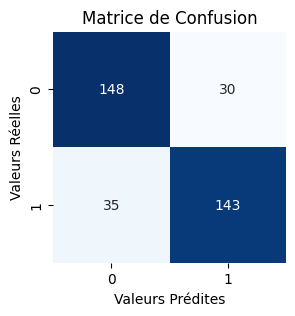

In [ ]:
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_mat_ada, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()

In [ ]:
# Evaluate the model on the test set using best parameters
accuracy_ada=accuracy_score(y_resampled_test, y_pred_ada)
precision_ada=precision_score(y_resampled_test, y_pred_ada)
recall_ada = recall_score(y_resampled_test,y_pred_ada)
nmi_ada = nmi(y_resampled_test,y_pred_ada)
f_score_ada = f1(y_resampled_test,y_pred_ada)


test_accuracy_bd.append(accuracy_ada)
test_precision_bd.append(precision_ada)
test_recall_bd.append(recall_ada)
test_NMI_bd.append(nmi_ada)
test_F_score_bd.append(f_score_ada)



print("Accuracy:",accuracy_ada)
print("Precision:",precision_ada)
print("Recall:",recall_ada)
print('NMI: ',nmi_ada)
print("F-score: ", f_score_ada)

Accuracy: 0.8174157303370787
Precision: 0.8087431693989071
Recall: 0.8314606741573034
NMI:  0.3147765844267728
F-score:  0.8199445983379501


###ExtraTreesClassifier

In [ ]:
# Define the ExtraTreesClassifier
et_classifier = ExtraTreesClassifier(random_state=42)

# Define the hyperparameters grid to search through
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=et_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to find the best parameters
grid_search.fit(X_resampled_train, y_resampled_train)

# Get the best parameters, the best score and the best model
best_params_et = grid_search.best_params_
best_score_et = grid_search.best_score_
best_classifier_et = grid_search.best_estimator_

print("Best Parameters:", best_params_et)
print("Best Score:", best_score_et)

#Predict the response for test dataset
y_pred_et = best_classifier_et.predict(X_resampled_test)
confusion_mat_et = confusion_matrix(y_resampled_test, y_pred_et)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.8046742730953259


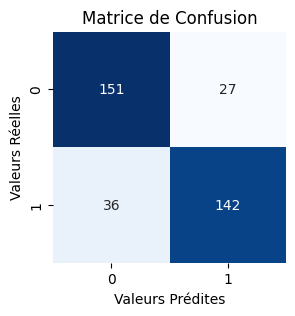

In [ ]:
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(confusion_mat_et, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matrice de Confusion")
plt.xlabel("Valeurs Prédites")
plt.ylabel("Valeurs Réelles")
plt.show()

In [ ]:
# Evaluate the model on the test set using best parameters
accuracy_et=accuracy_score(y_resampled_test, y_pred_et)
precision_et=precision_score(y_resampled_test, y_pred_et)
recall_et = recall_score(y_resampled_test,y_pred_et)
nmi_et = nmi(y_resampled_test,y_pred_et)
f_score_et = f1(y_resampled_test,y_pred_et)


test_accuracy_bd.append(accuracy_et)
test_precision_bd.append(precision_et)
test_recall_bd.append(recall_et)
test_NMI_bd.append(nmi_et)
test_F_score_bd.append(f_score_et)



print("Accuracy:",accuracy_et)
print("Precision:",precision_et)
print("Recall:",recall_et)
print('NMI: ',nmi_et)
print("F-score: ", f_score_et)

Accuracy: 0.8230337078651685
Precision: 0.8074866310160428
Recall: 0.848314606741573
NMI:  0.3282369984114453
F-score:  0.8273972602739725


In [ ]:
data = {
    'Model': models * 5,
    'Metric': ['Accuracy'] * 12 + ['Precision'] * 12 + ['Recall'] * 12 + ['NMI'] * 12 + ['F-score'] * 12,
    'Score': test_accuracy_bd + test_precision_bd + test_recall_bd + test_NMI_bd + test_F_score_bd
}

df = pd.DataFrame(data)

fig = px.bar(df, x='Model', y='Score', color='Metric', barmode='group', title='Scores des métriques pour différents modèles')
fig.update_xaxes(tickangle=45)
fig.show()

###**Interprétation des résultats**

**LinearDiscriminantAnalysis, RandomForest , XGBClassifier, GradientBoostingClassifier, AdaBoostClassifier et ExtraTreesClassifier** démarquent généralement comme des modèles plus performants dans ce cas pour lesquels l'accuracy et le NMI ont été améliorés sans altérer considérablement les autres métriques. Ces modèles démontrent une performance plus équilibrée selon différents critères d'évaluation.

**KNN** présente des performances plus faibles par rapport à d'autres modèles selon la plupart des métriques, ce qui pourrait indiquer des limitations potentielles dans la prédiction précise du risque de crédit sur l'ensemble de données équilibrées.



**Conclusions :**
Choix du meilleur modèle : En prenant une vue d'ensemble, LinearDiscriminantAnalysis, RandomForest , XGBClassifier, GradientBoostingClassifier, AdaBoostClassifier et ExtraTreesClassifier sont de meilleurs choix pour la prédiction du risque de crédit avec les données équilibrées en raison de leurs performances supérieures selon plusieurs métriques.



### Comparaison entre des résultats entre les méthodes: Supervised with balanced data vs Supervised with imbalanced data

In [ ]:
# Sample data (replace these lists with your actual data)
methods = ['Supervised with umbalanced data', 'Supervised with balanced data']
metrics = ['Accuracy', 'Precision', 'Recall', 'NMI', 'F_score']

# Sample data for metrics (replace these lists with your actual data)
data_values = [
        test_accuracy,test_precision,test_recall,test_NMI,test_F_score,test_accuracy_bd,test_precision_bd,test_recall_bd,test_NMI_bd,test_F_score_bd
]

transposed_values = np.array(data_values).T

# Creating a MultiIndex for columns
columns = pd.MultiIndex.from_product([methods, metrics])

# Creating a DataFrame with MultiIndex columns
df = pd.DataFrame(transposed_values, columns=columns)
df.insert(0, 'Model', models)  # Adding 'Model' column

# Display DataFrame
print(df.to_string(index=False))

                        Model Supervised with umbalanced data                                      Supervised with balanced data                                     
                                                     Accuracy Precision   Recall      NMI  F_score                      Accuracy Precision   Recall      NMI  F_score
                 RandomForest                           0.772  0.910112 0.910112 0.131496 0.850394                      0.828652  0.887640 0.887640 0.348897 0.838196
                 DecisionTree                           0.748  0.780488 0.898876 0.088923 0.835509                      0.761236  0.771930 0.741573 0.207557 0.756447
                   GaussianNB                           0.732  0.867550 0.735955 0.141849 0.796353                      0.789326  0.794286 0.780899 0.257360 0.787535
   LinearDiscriminantAnalysis                           0.788  0.830688 0.882022 0.172032 0.855586                      0.837079  0.812500 0.876404 0.363340 0.843243
Quad

**Interprétation des résultats :**
L'équilibrage des données a eu un impact significatif sur les performances des modèles de classification, démontrant des améliorations marquées dans des métriques : l'Accuracy et l'indice de similarité NMI. En revanche, on remarque que pour les métriques Précision et Recall les résultats ne sont pas stables et varient d'un algorithme à un autre (Pour certains algorithmes le recall et la précision ont augmenté et pour d'autres ont diminué). On constate que les meilleurs résultats de la métrique F-Score sont obtenus avec l'entrainement du modèle sur les données déséquilibrées.

Il est intéressant de noter que l'efficacité de l'équilibrage varie selon les modèles. Par exemple, cette technique a amélioré les métriques Accuracy, Recall et Precision pour le modèle Quadratic Discriminant Analysis, atteignant 79% d'accuracy, 41% de NMI et un rappel (recall) de 100%. En revanche, son impact a été minime pour le modèle KNN, entraînant une chute drastique des scores.

Ces résultats suggèrent que certains modèles sont plus aptes que d'autres à traiter des données équilibrées. C'est notamment le cas pour LDA, les Random Forests, XGBClassifier, GradientBoostingClassifier, AdaBoostClassifier et ExtraTreesClassifier pour lesquels l'accuracy et le NMI ont été améliorés sans altérer considérablement les autres métriques.

En conclusion, travailler sur la classification avec des variables mixtes peut présenter des défis. Cependant, en utilisant l'approche du one-hot encoding pour les variables catégorielles, des résultats très positifs ont été obtenus. De plus, l'équilibrage des données ne garantit pas toujours une amélioration de la performance du modèle.

Il est remarquable qu'il existe plusieurs modèles adaptés à la classification des variables mixtes, notamment LDA et les forêts aléatoires, XGBClassifier, GradientBoostingClassifier, AdaBoostClassifier et ExtraTreesClassifier qui se démarquent comme des choix performants. En optimisant les paramètres et en explorant diverses combinaisons, comme observé avec LDA, les arbres de décision et la méthode KNN (en choisissant la valeur de k), XGBClassifier, GradientBoostingClassifier, AdaBoostClassifier et ExtraTreesClassifier, il est possible d'améliorer significativement nos modèles.

#Partie 2 : Données relationnelles

L’objectif de cette partie du projet est de mener une étude comparative des différentes méthodes de classification sur des données relationnelles. Dans cette section, on a 3 ensembles de données et on est amené à choisir un seul ensemble de données.
Cora : L'ensemble de données Cora comprend 2708 publications scientifiques classées dans l'une des sept classes. Le réseau de citations comprend 5429 liens. Chaque publication dans l'ensemble de données est décrite par un vecteur de mot de valeur 0/1 indiquant l'absence / la présence du mot correspondant dans le dictionnaire. Le dictionnaire se compose de 1433 mots uniques.

##Libraries

In [ ]:
from scipy.io import loadmat
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

## Importation des données

In [ ]:
mat = loadmat('cora.mat')
print(mat['fea'].shape)

(2708, 1433)


In [ ]:
X = np.array(mat['fea'])
W = np.array(mat['W'])
y = (np.array(mat['gnd'])).flatten()
y.shape

(2708,)

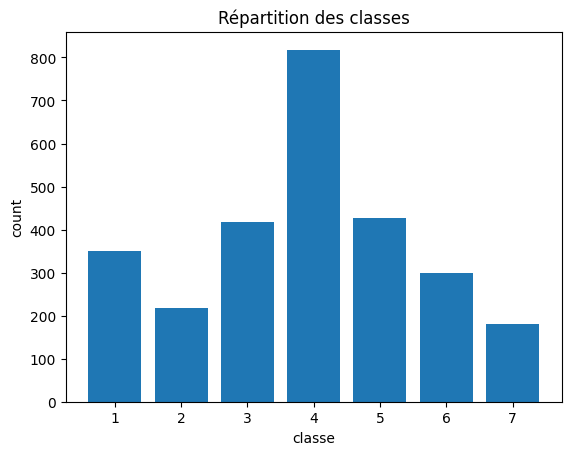

In [ ]:
(unique, counts) = np.unique(y, return_counts=True)

plt.bar(unique, counts)
plt.xlabel("classe")
plt.ylabel("count")
plt.title("Répartition des classes")
plt.show()

On remarque bien que les classes sont un peu déséquilibrées.

Pour tester les différents modèles, on utilise une validation croisée avec 10 blocs.
Les modèles qu'on va comparer sont les suivants : Naive Bayes, KNN, LDA, QDA, Linear SVM, Non-Linear SVM, Logistic Regression, CART, Random Forest.

In [ ]:
seed = 42
nb_folds = 10
kfold = StratifiedKFold(n_splits=nb_folds, random_state=seed, shuffle=True)
scores = ["accuracy", "normalized_mutual_info_score", "f1_weighted"]
models = []

# Algorithmes à comparer
models.append(("Naive Bayes", GaussianNB()))
models.append(('KNN', KNeighborsClassifier(metric="jaccard")))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("QDA", QuadraticDiscriminantAnalysis()))
models.append(('Linear SVM', SVC(kernel='linear', max_iter=300000, random_state=seed)))
models.append(('Non-Linear SVM', SVC(max_iter=9999, random_state=seed)))
models.append(("Logistic Regression", LogisticRegression(random_state=seed)))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(("Random Forest", RandomForestClassifier(random_state=seed)))

def evaluate_model(data, model_name, model):
  result = cross_validate(model, data, y, cv=kfold, scoring=scores)
  print(model_name)
  mean_acc = result['test_accuracy'].mean()
  mean_nmi = result['test_normalized_mutual_info_score'].mean()
  mean_f1 = result['test_f1_weighted'].mean()
  print(f"Accuracy moyenne : {mean_acc:.2f}", end=' - ')
  print(f"NMI moyenne : {mean_nmi.mean():.2f}", end=' - ')
  print(f"F1 score moyen : {mean_f1.mean():.2f}", end='\n\n')
  return [mean_acc, mean_nmi, mean_f1]

def evaluate_models(data, models):
  results = []
  print(f"Classification croisée avec {nb_folds} blocs :")
  for model_name, model in models:
    results.append((model_name, evaluate_model(data, model_name, model)))
  return results

def compare_classification_results(results, title):

  x = np.arange(len(results))  # the label locations
  width = 0.20  # the width of the bars
  model_names, accs, nmis, f1s = [], [], [], []
  for model_name, result in results:
     model_names.append(model_name)
     accs.append(round(result[0], 2))
     nmis.append(round(result[1], 2))
     f1s.append(round(result[2], 2))

  fig, ax = plt.subplots(figsize=(15,6))
  rects1 = ax.bar(x - width, accs, width, label='Accuracy')
  rects2 = ax.bar(x, nmis, width, label='NMI')
  rects3 = ax.bar(x + width, f1s, width, label='F1 score')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_title(title)
  ax.set_xticks(x, model_names)
  ax.legend()

  ax.bar_label(rects1, padding=3)
  ax.bar_label(rects2, padding=3)
  ax.bar_label(rects3, padding=3)

  fig.tight_layout()

  plt.show()

### Classification avec X

In [ ]:
cora_results = evaluate_models(X, models)

Classification croisée avec 10 blocs :
Naive Bayes
Accuracy moyenne : 0.49 - NMI moyenne : 0.22 - F1 score moyen : 0.49



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/me

KNN
Accuracy moyenne : 0.73 - NMI moyenne : 0.49 - F1 score moyen : 0.72

LDA
Accuracy moyenne : 0.64 - NMI moyenne : 0.37 - F1 score moyen : 0.64



/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/disc

QDA
Accuracy moyenne : 0.14 - NMI moyenne : 0.04 - F1 score moyen : 0.09

Linear SVM
Accuracy moyenne : 0.73 - NMI moyenne : 0.50 - F1 score moyen : 0.73

Non-Linear SVM
Accuracy moyenne : 0.76 - NMI moyenne : 0.56 - F1 score moyen : 0.76

Logistic Regression
Accuracy moyenne : 0.77 - NMI moyenne : 0.56 - F1 score moyen : 0.77

CART
Accuracy moyenne : 0.65 - NMI moyenne : 0.39 - F1 score moyen : 0.65

Random Forest
Accuracy moyenne : 0.76 - NMI moyenne : 0.55 - F1 score moyen : 0.76



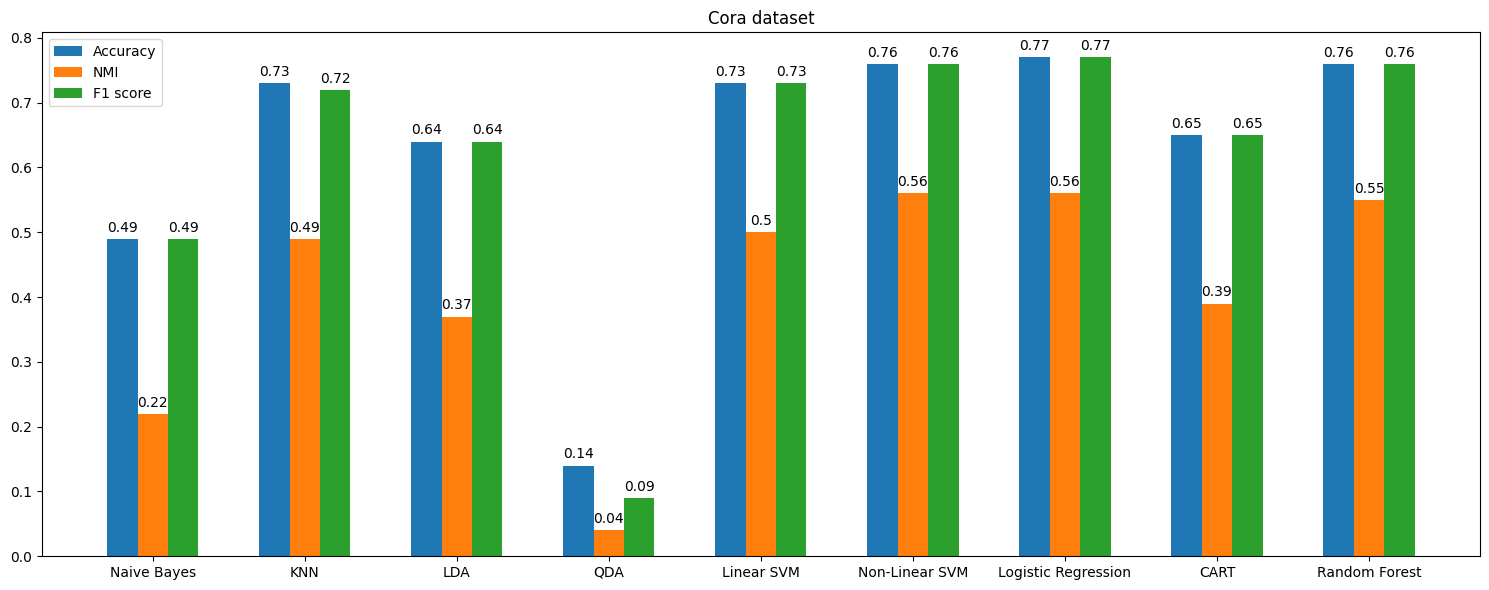

In [ ]:
compare_classification_results(cora_results, "Cora dataset")

On remarque que la meilleure classification était faite par Logistic Regression suivée par Non-Linear SVM et Random Forest. Par contre le modèle qui a donné les mauvaises résultats c'est QDA avec un F1 Score de 0.09.

### Classification avec la combinaison de W et X

In [ ]:
W.shape

(2708, 2708)

In [ ]:
n = W.shape[0]
D =  np.zeros(shape = W.shape)
for i in range(n):
  D[i,i] = np.sum(W[i])

On calcule la matrice M = D^(-1)* W * X où D est une matrice diagonale, chaque valeur diagonale correspondand à la somme des valeurs d’une ligne de W.

In [ ]:
M = np.linalg.inv(D)@W@X
M.shape

(2708, 1433)

In [ ]:
cora_results_M = evaluate_models(M, models)

Classification croisée avec 10 blocs :
Naive Bayes
Accuracy moyenne : 0.73 - NMI moyenne : 0.51 - F1 score moyen : 0.73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/me

KNN
Accuracy moyenne : 0.82 - NMI moyenne : 0.64 - F1 score moyen : 0.82

LDA
Accuracy moyenne : 0.75 - NMI moyenne : 0.53 - F1 score moyen : 0.75



/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/disc

QDA
Accuracy moyenne : 0.40 - NMI moyenne : 0.30 - F1 score moyen : 0.45

Linear SVM
Accuracy moyenne : 0.82 - NMI moyenne : 0.64 - F1 score moyen : 0.82

Non-Linear SVM
Accuracy moyenne : 0.82 - NMI moyenne : 0.65 - F1 score moyen : 0.82

Logistic Regression
Accuracy moyenne : 0.84 - NMI moyenne : 0.66 - F1 score moyen : 0.84

CART
Accuracy moyenne : 0.72 - NMI moyenne : 0.49 - F1 score moyen : 0.72

Random Forest
Accuracy moyenne : 0.83 - NMI moyenne : 0.66 - F1 score moyen : 0.83



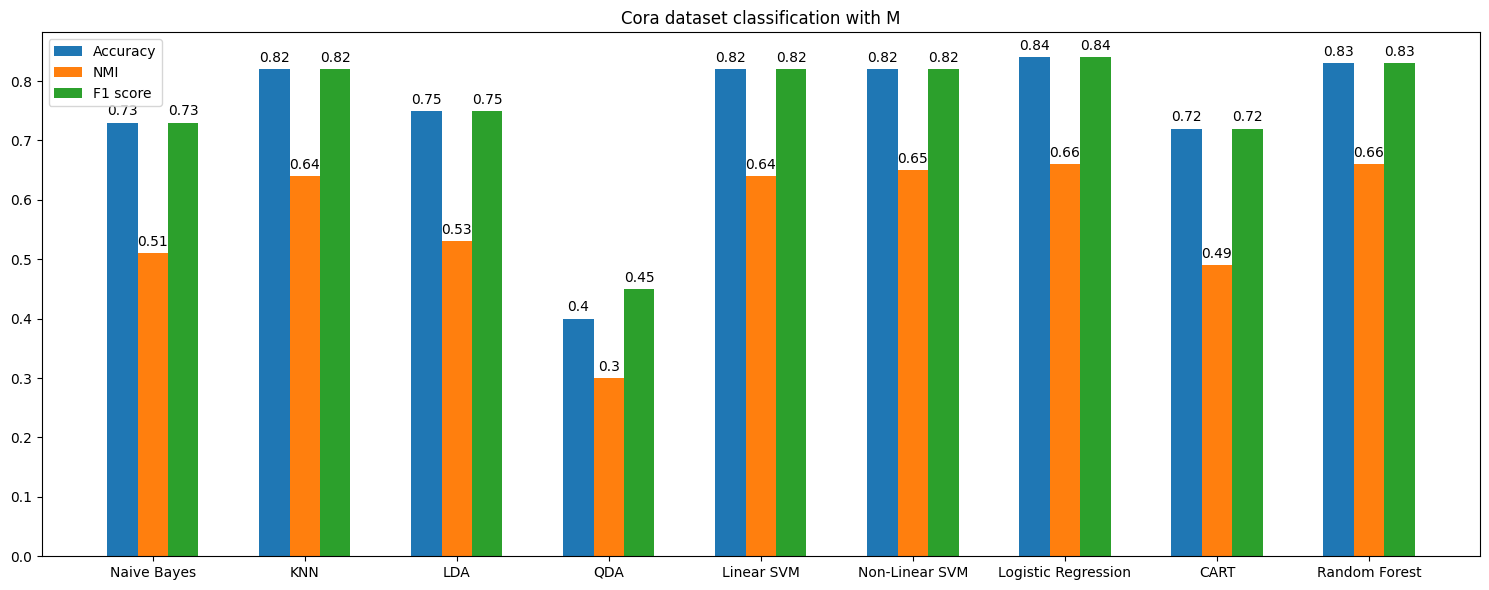

In [ ]:
compare_classification_results(cora_results_M, "Cora dataset classification with M")

En utilisant la combinaison de W et X plutôt que seulement la matrice X, on obtient des résultats de classification nettement meilleurs.

### Autre combinaison de W et X

La matrice M, résultant de D^(-1) * W * X, correspond en fait à une moyenne
de tous les vecteurs de mots des documents associés à un document (dans W). En effet, chaque cellule M[i,j] est égale à :

(t1 + ... + tv) / v

où v est le nombre de documents associés (voisins) au document i et t1 à tv les valeurs de X des voisins pour la colonne j.

Dans ce cas de figure, le document i n'intervient donc pas dans sa propre représentation. Or, on peut estimer qu'un document n'est pas défini que par ses voisins mais aussi par lui-même.

Nous pouvons donc utiliser une nouvelle représentation M_moy :

M_moy = (X + M) / 2

Ainsi, ici, le document originel (X) compte pour 50% et la moyenne de ses voisins (M) pour les 50% restants.

In [ ]:
M_moy = (M + X) / 2

In [ ]:
cora_results_M_moy = evaluate_models(M_moy, models)

Classification croisée avec 10 blocs :
Naive Bayes
Accuracy moyenne : 0.80 - NMI moyenne : 0.61 - F1 score moyen : 0.80



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/me

KNN
Accuracy moyenne : 0.85 - NMI moyenne : 0.69 - F1 score moyen : 0.85

LDA
Accuracy moyenne : 0.84 - NMI moyenne : 0.67 - F1 score moyen : 0.84



/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/disc

QDA
Accuracy moyenne : 0.22 - NMI moyenne : 0.15 - F1 score moyen : 0.22

Linear SVM
Accuracy moyenne : 0.88 - NMI moyenne : 0.74 - F1 score moyen : 0.88

Non-Linear SVM
Accuracy moyenne : 0.90 - NMI moyenne : 0.77 - F1 score moyen : 0.90

Logistic Regression
Accuracy moyenne : 0.88 - NMI moyenne : 0.75 - F1 score moyen : 0.88

CART
Accuracy moyenne : 0.78 - NMI moyenne : 0.57 - F1 score moyen : 0.78

Random Forest
Accuracy moyenne : 0.88 - NMI moyenne : 0.74 - F1 score moyen : 0.88



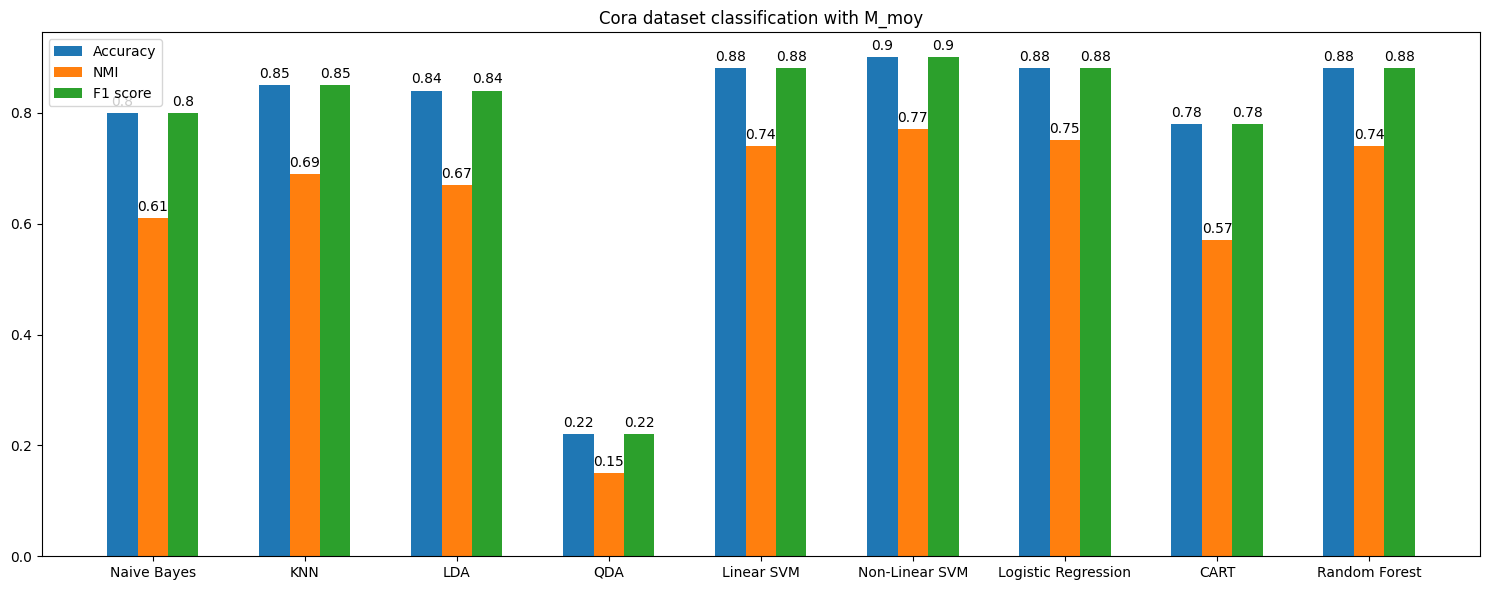

In [ ]:
compare_classification_results(cora_results_M_moy, "Cora dataset classification with M_moy")

Les résultats de classification sont meilleurs avec M_moy que M, ce qui confirme notre intuition sur l'utilisation d'un document i et ses voisins plutôt que seulement ses voisins.